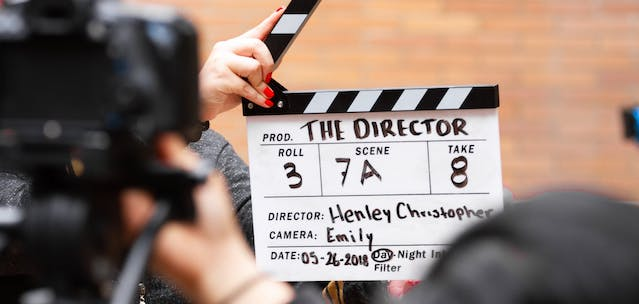

# Dsc-Phase1-Project

**Author**: Valerie Kaswii Vinya

## Overview
Microsoft intends to open a new film studio in an attempt to enter the lucrative field of producing original video content. The difficulty comes in deciding what kinds of films to make without prior knowledge of the ever-changing motion picture industry. With the use of the 'imdb.title.basics.csv' dataset—which contains vital details such movie titles, release years, runtimes, and genres—the goal is to examine patterns in box office successes. 

The outcomes will provide Microsoft's new film company with important direction regarding the kinds of movies to concentrate on, allowing them to deliberately produce content that appeals to audiences and optimizes box office earnings. The analysis's recommendations will provide Microsoft's head of studios the ability to make well-informed decisions, giving them a competitive advantage in the rapidly changing film business.

_________________________________________________________________

## Business Problem
Microsoft is taking on the task of launching a new film studio in the cutthroat film industry. Since the corporation does not have experience making movies, it must determine which film genres would yield the highest returns on investment. Investigating the kinds of movies that are currently doing well at the box office and turning the results into useful information for Microsoft's upcoming film studio are the main objectives. 
__________________________________________________________________



## Data Understanding

### Origin of the Data:
The information contained in the dataset 'imdb.title.basics.csv' was obtained from IMDb, a well-known online resource for movies, TV shows, and celebrities. IMDb is a useful resource for information about movies since it offers user-generated content, such as reviews, ratings, and storyline summaries.

### Relevance to Data Analysis Questions:
The dataset contains vital information about films, including names, years of release, durations, and genres. These characteristics allow for a thorough examination of movie genres, their financial performance, runtime impact, and popularity patterns. They also directly link to the previously given data analysis questions.

The dataset includes both categorical variables and numerical variables.

_____________________________________________________________

## Data Analysis Questions
#### 1. What are the most common movie genres in the dataset?

The purpose of this inquiry is to determine whether genre is most popular or that appears most frequently in the dataset, ***based on the quantity of films made (generated) or the preferences of the audience (popularity).***

#### 2. How has the average movie runtime changed over the years?

Calculate the average runtime of movies for each year in the 'start_year' column. Plot this information to visualize trends in movie lengths over time.

#### 3. What is the distribution of movie runtimes within specific genres?

Understanding the range of movie durations within genres can provide insights into the flexibility of runtime preferences within specific audience segments.

_____________________________________________________________

## Data Preparation
#### 1. Creating Necessary Variables:

There was a need to develop new variables in light of the analysis queries. For instance, I made subsets of the data for each genre and use them to compute the distribution of movie runtimes within those genres. This required building fresh dataframes with genre filters.

#### 2. Handle the missing values:

Checked if there were any missing values in the columns and decided whether to drop the corresponding rows or fill in the missing values by using a suitable strategy. For the genres column, there was a small percentage of missing values, therefore dropping the rows has a minimal impact on the overall size of the dataset.

#### 3. Handling outliers

Looked for outliers in the 'runtime_minutes' column. Calculations of average runtime may be distorted by movie runtime outliers. Depending on the particular analysis questions and the makeup of the dataset, I determined whether to retain or eliminate outliers. To visually identify outliers, I used visualization techniques like box plots.

#### 4. Data Integrity and Consistency:

Ensured that the data in the 'genres' column is consistent and standardized. I removed any leading or trailing spaces and converted genres to lowercase for consistency. This step was important to avoid duplicate entries or mismatches during analysis.
____________________________________________________________

## Data Cleaning

To start, I will first load the data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
#C:\Users\DELL\Documents\PHASE_1\dsc-phase-1-project\zippedData
df = pd.read_csv('C:/USERS/DELL/Documents/PHASE_1/dsc-phase-1-project/zippedData/imdb.title.basics.csv')
df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


Next is inspecting the overall shape of the dataframe:

In [9]:
df.shape

(146144, 6)

Now let's look at the info printout:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


There are certain columns above that have missing values. These include: 'genres', 'runtime_minutes' and 'original_title'. Since the genres and runtime columns are important for our analysis, we must first deal with the missing values.


### First let's handle the genres column:

In [12]:
missing_genres = df['genres'].isna().sum()
print(f"Number of missing values in 'genres': {missing_genres}")

Number of missing values in 'genres': 5408


In [14]:
perc_missing_genres = (df['genres'].isna().sum() / len(df['genres'])) * 100
print(perc_missing_genres)

3.7004598204510617


In [15]:
df.dropna(subset=['genres'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140736 non-null  int64  
 4   runtime_minutes  112233 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


The number of missing values in the 'genres' column is rather low, 3.7% in your case, thus removing these rows doesn't significantly affect the dataset's overall size.

### Handling the runtime column:

In [13]:
#missing_runtime = df['runtime_minutes'].isna().sum()
#print(f"Number of missing values in 'runtime_minutes': {missing_runtime}")

Number of missing values in 'runtime_minutes': 31739


## Data Modeling
#### 1. Genre Analysis:

- For the analysis of the most common movie genres, I used simple counting techniques and visualization tools to represent the frequency of each genre in the dataset. 

#### 2. Trends in Movie Runtimes:

- To analyze the trends in average movie runtimes over the years, I calculated the mean runtime for each year and plotted the data.

#### 3. Distribution of Movie Runtimes within Specific Genres:

- In order to understand the distribution of movie runtimes within specific genres, I used histograms and box plots for visualization. This allowed me to compare the runtime flexibility across different genres effectively.
______________________________________________________________

In [ ]:
# Here you run your code to model the data

## Evaluation
Evaluate how well your work solves the stated business problem.
____

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model?
- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
_____

# Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.
____

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project?
____
